In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy import arange
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn import preprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn import model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, max_error, r2_score, mean_squared_error, mean_absolute_error


In [2]:
df = pd.read_csv('Boston.csv', index_col=False)

In [3]:
def evaluate_predictions(y_pred, y):
    result = "Explained variance: {}".format(explained_variance_score(y, y_pred))
    result += "\nMean Squared Error: {}".format(mean_squared_error(y, y_pred))
    result += "\nMax Error: {}".format(max_error(y, y_pred))
    result += "\nR2 score: {}".format(r2_score(y, y_pred))
    result += "\nMean Absolute Error: {}".format(mean_absolute_error(y, y_pred))
    return result

In [25]:
df['rad'].value_counts()
df['medv'].value_counts()


50.0    16
25.0     8
21.7     7
22.0     7
23.1     7
        ..
14.2     1
26.7     1
32.9     1
39.8     1
9.7      1
Name: medv, Length: 229, dtype: int64

In [5]:
Y = df[['crim']]
Y.head(5)

,crim
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905


In [6]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [7]:
X = df[['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']]
X.head(5)

,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
# Normalize data

X = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

y_array = Y.values #returns a numpy array
y_scaled = min_max_scaler.fit_transform(y_array.reshape(-1, 1))
Y = pd.DataFrame(y_scaled)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

In [10]:
## RIDGE ##
print("Ridge: ")
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

ridge_model = Ridge(alpha=0.99)
ridge_model.fit(X_train, y_train)

print("Results for Ridge:")
print(evaluate_predictions(y_test, ridge_model.predict(X_test)))

Ridge: 
MAE: -0.030
Config: {'alpha': 0.99}
Results for Ridge:
Explained variance: -0.4759755072055729
Mean Squared Error: 0.00609854877450626
Max Error: 0.6673169937058735
R2 score: -0.4763755788188917
Mean Absolute Error: 0.03253101438007718


In [20]:
## LASSO ##

print("Lasso: ")
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0.001, 0.015, 0.001)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

lasso_model = Lasso(alpha=0.003)
result = lasso_model.fit(X_train, y_train)

print(result.coef_.tolist())

print("Results for Lasso:")
print(evaluate_predictions(y_test, lasso_model.predict(X_test)))

print(lasso_model.coef_)
print(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'])

Lasso: 
MAE: -0.028
Config: {'alpha': 0.003}
[-0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.13227371001855992, 0.0, 0.0, -0.0, 0.0, -0.011440959697246325]
Results for Lasso:
Explained variance: -1.490059135830411
Mean Squared Error: 0.006885050976232026
Max Error: 0.6997452704987985
R2 score: -1.491233310762162
Mean Absolute Error: 0.0320999977683502
[-0.          0.         -0.          0.         -0.          0.
 -0.          0.13227371  0.          0.         -0.          0.
 -0.01144096]
['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


PCR: 


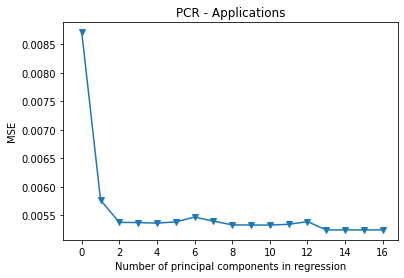

Results for PCR:
Explained variance: -0.7462719964638374
Mean Squared Error: 0.006565214898864561
Max Error: 0.6724030332924679
R2 score: -0.7468110283136866
Mean Absolute Error: 0.03593448372481414


In [30]:
## PCR ##
print("PCR: ")
pca = PCA()
X_reduced_train = pca.fit_transform(X_train)

# 10-fold CV, with shuffle
n = len(X_reduced_train)
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []
# Calculate MSE with only the intercept (no principal components in regression)
score = -1 * model_selection.cross_val_score(regr, np.ones((n, 1)), y_train.values.ravel(), cv=kf_10,
                                             scoring='neg_mean_squared_error').mean()
mse.append(score)

# Calculate MSE using CV for the 16 principle components, adding one component at the time.
for i in np.arange(1, 17):
    score = -1 * model_selection.cross_val_score(regr, X_reduced_train[:, :i], y_train.values.ravel(), cv=kf_10,
                                                 scoring='neg_mean_squared_error').mean()
    mse.append(score)

# Plot results
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('PCR - Applications')
plt.xlim(xmin=-1)
plt.show()

X_reduced_test = pca.transform(X_test)[:,:2]

# Train regression model on training data
regr = LinearRegression()
regr.fit(X_reduced_train[:,:2], y_train)

print("Results for PCR:")
print(evaluate_predictions(y_test, regr.predict(X_reduced_test)))